In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d

sys.path.insert(0, "../")

import warnings
warnings.filterwarnings('ignore')

from michael import janet

Getting a `x0 is infeasible` error when running the curve_fit to the wavelet portion. Let's try and identify the target.

In [2]:
uni = pd.read_csv("/Users/oliver hall/Research/unicorn/data/unicorn.csv", index_col=0)

In [3]:
index = 2#uni[uni.source_id == int(48977371798954368)].index[0]

Target DR3 ID 5311109828992983168 has tesscut data available on MAST for Sectors 8, 9, 36
Data already downloaded for Sector 8.
Data already downloaded for Sector 9.
Data already downloaded for Sector 36.


Running pixels in aperture: 100%|████████████| 300/300 [00:01<00:00, 252.01it/s]


### Running Simple Astropy Lomb-Scargle on Sector 8-9 on star 5311109828992983168 ###
### Completed Simple Astropy Lomb-Scargle for Sector 8-9 on star 5311109828992983168 ###
### Running Wavelet Estimation for Sector 8-9 on star 5311109828992983168 ###


100%|███████████████████████████████████████| 1522/1522 [00:42<00:00, 36.15it/s]
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


### Completed Wavelet Estimation for Sector 8-9 on star 5311109828992983168 ###
### Running Composite ACF estimation for Sector 8-9 on star 5311109828992983168 ###
### Completed Composite ACF estimation for Sector 8-9 on star 5311109828992983168 ###
### Running ACF Estimation on star 5311109828992983168 ###
### Completed ACF Estimation for Sector 8-9 on star 5311109828992983168 ###


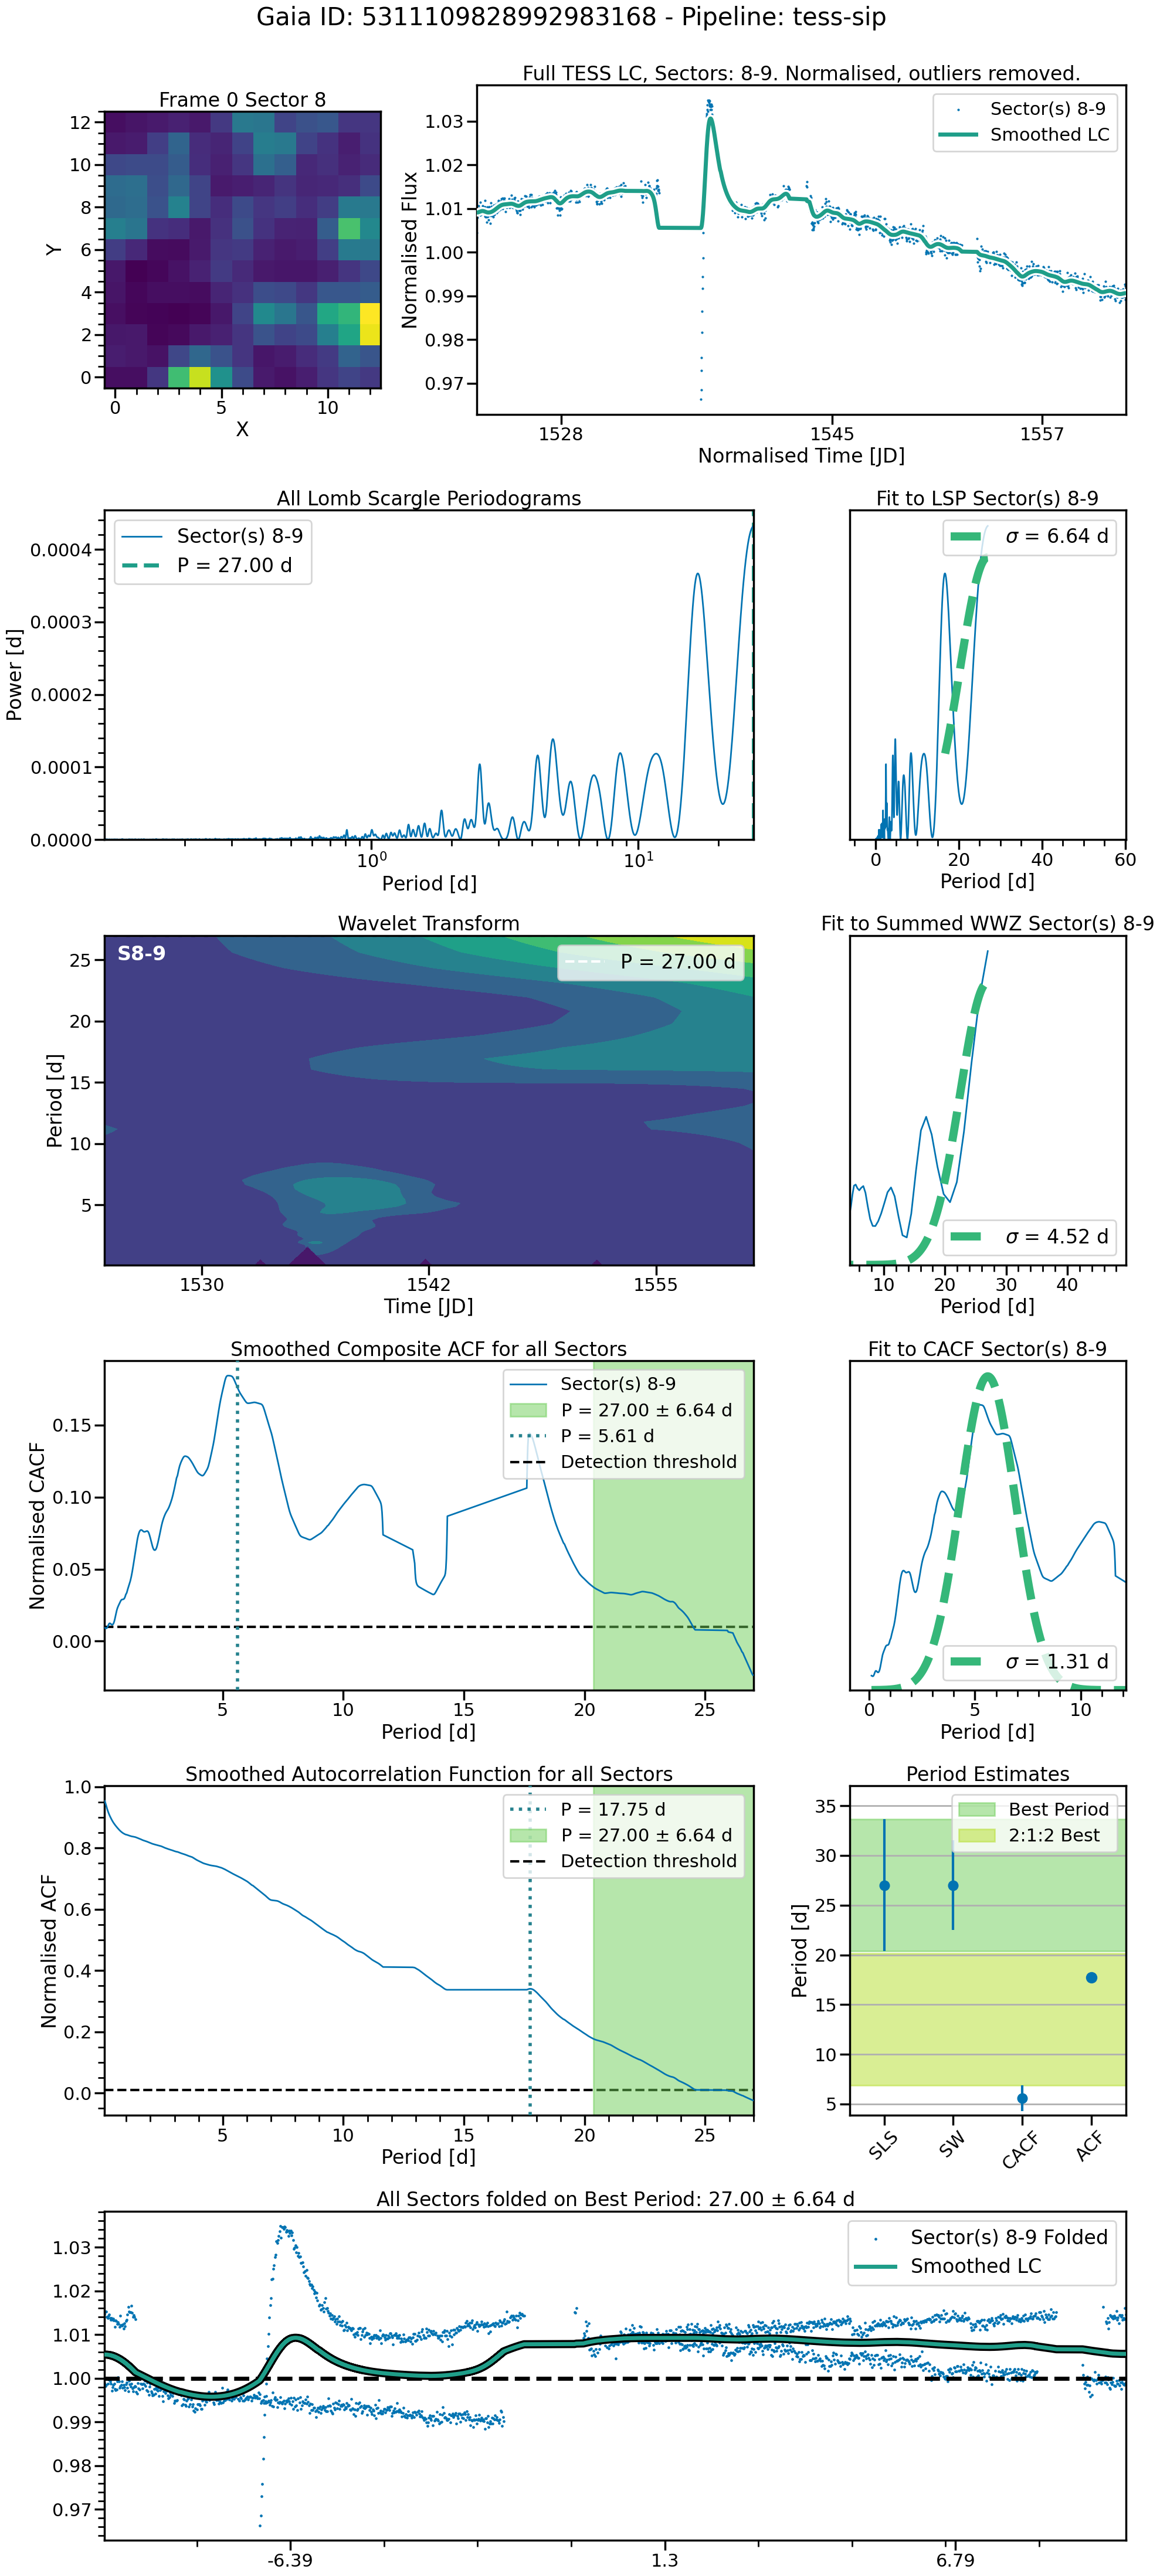

In [6]:
for method in ['tess-sip']:#'eleanor', 'eleanor-corner','eleanor-pca', 'unpopular','tess-sip']:
    j = janet.boot(uni, index=index, pipeline = method)
    j.prepare_data()
    j.get_rotation(period_range=(0.1, 27))
    j.validate_rotation()
    j.view()
    plt.show()

In [ ]:
j.sectors

In [ ]:
raise ValueError

In [ ]:
j.prepare_data()

In [ ]:
any([len(a) > 2 for a in j.sectors])

Cleaning up the data seems to have fixed things. Either way we'll still just change the data downloading process to avoid anything like this in the future.

In [ ]:
sys.exit()

In [ ]:
j.void['r_43-44']['raw_lc'].plot()

In [ ]:
j.void['rawlc_43-44'].plot()

Let's fix the cpm times

In [ ]:
import glob
from astropy.coordinates import SkyCoord
import os
import astropy.units as u
rastr = str(j.ra)
step = len(rastr.split('.')[0])
decstr = str(j.dec)
step = len(decstr.split('.')[0])
sfiles = np.sort(glob.glob(f'{os.path.expanduser("~")}/.eleanor/tesscut/*{rastr[:(6+step)]}*{decstr[:(6+step)]}*'))
coords = SkyCoord(ra = j.ra, dec = j.dec, unit = (u.deg, u.deg))

if len(sfiles) == 0:
    sfiles = np.sort(glob.glob(f'{os.path.expanduser("~")}/.eleanor/tesscut/*{rastr[:(4+step)]}*{decstr[:(4+step)]}*'))
    if len(sfiles) == 0:
        raise ValueError("No tesscut files could be found for this target.")

if len(sfiles) < len(j.sectorlist):
    raise ValueError("There are more sectors available than have been "+
                    "loaded into the sectorlist. Reset the data.")

In [ ]:
sfiles

In [ ]:
from michael.janet import pipelines
f"{', '.join(list(pipelines))}"

In [ ]:
list(j.methods)